In [2]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import os
import math
from random import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns

In [3]:
path = 'C:\\Users\\harik\\OneDrive\\Documents\\Python\\Graphene\\ANN\\new\\3_layer_32-16-8'
os.chdir(path)
os.getcwd()

'C:\\Users\\harik\\OneDrive\\Documents\\Python\\Graphene\\ANN\\new\\3_layer_32-16-8'

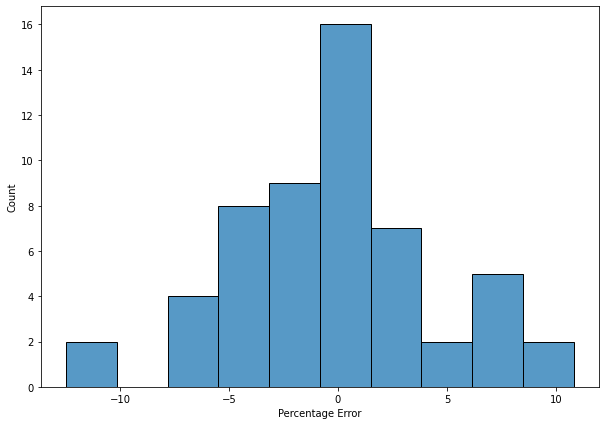

In [4]:
df = pd.read_csv('Pred_True.csv', delimiter = ",")
#df.drop(df.columns[[0]], axis = 1, inplace = True)
df['Percentage Error'] = (df['Prediced'] - df['TRUE'])/df['TRUE']*100
fig = plt.figure(figsize=(10, 7))
sns.histplot(df['Percentage Error'], bins = 10)
plt.savefig('Pred_True_percentage_error.svg', dpi = 100)
df.to_csv('Pred_True_percentage_error.csv')

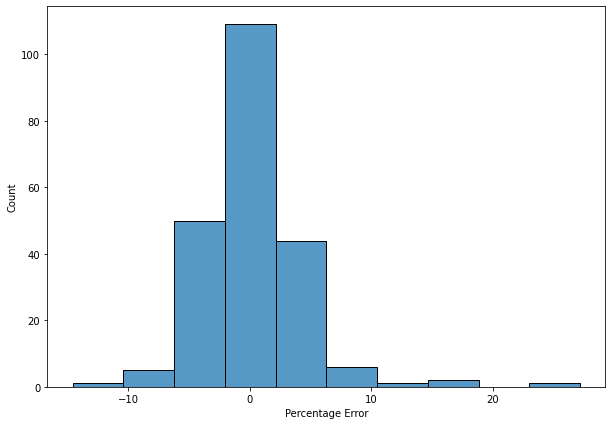

In [5]:
df1 = pd.read_csv('Pred_True_train.csv', delimiter = ",")
df1.drop(df.columns[[0]], axis = 1, inplace = True)
df1['Percentage Error'] = (df1['Prediced'] - df1['True'])/df1['True']*100
fig = plt.figure(figsize=(10, 7))
sns.histplot(df1['Percentage Error'], bins = 10)
plt.savefig('Pred_True_train_percentage_error.svg', dpi = 100)
df.to_csv('Pred_True_train_percentage_error.csv')

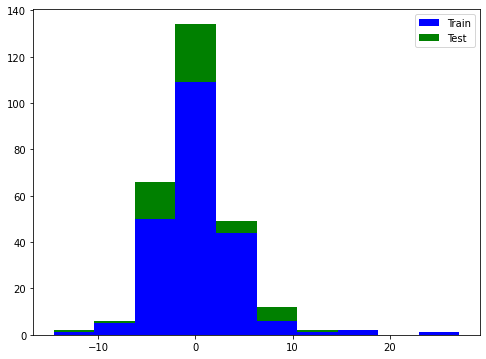

In [19]:
plt.figure(figsize=(8,6))
x = pd.DataFrame({'Train':df1['Percentage Error'], 'Test': df['Percentage Error']})
plt.hist(x, bins = 10, label = ['Train', 'Test'], color = ['blue', 'green'], stacked = True)
plt.legend(['Train', 'Test'])
plt.savefig('Pred_True_train-test_percentage_error.svg', dpi = 100)
x.to_csv('Pred_True_train-test_percentage_error.csv')

In [9]:
path = 'C:\\Users\\harik\\OneDrive\\Documents\\Python\\Graphene\\ANN-30\\new'
os.chdir(path)
os.getcwd()

'C:\\Users\\harik\\OneDrive\\Documents\\Python\\Graphene\\ANN-30\\new'

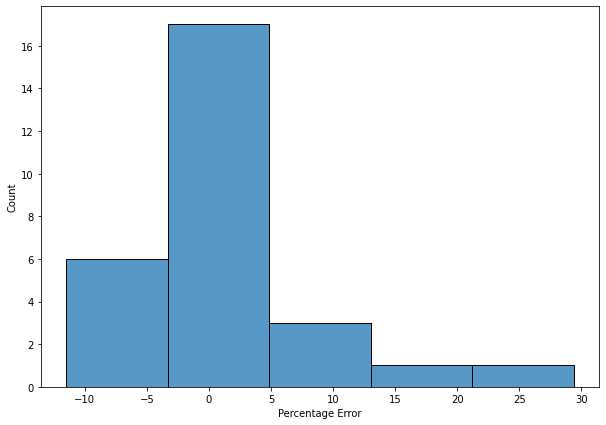

In [10]:
df = pd.read_csv('TrueVsPred-30-TL.csv', delimiter = ",")
#df.drop(df.columns[[0]], axis = 1, inplace = True)
df['Percentage Error'] = (df['Prediced'] - df['TRUE'])/df['TRUE']*100
fig = plt.figure(figsize=(10, 7))
sns.histplot(df['Percentage Error'], bins = 5)
plt.savefig('Pred_True_percentage_error.png', dpi = 100)
df.to_csv('Pred_True_percentage_error.csv')

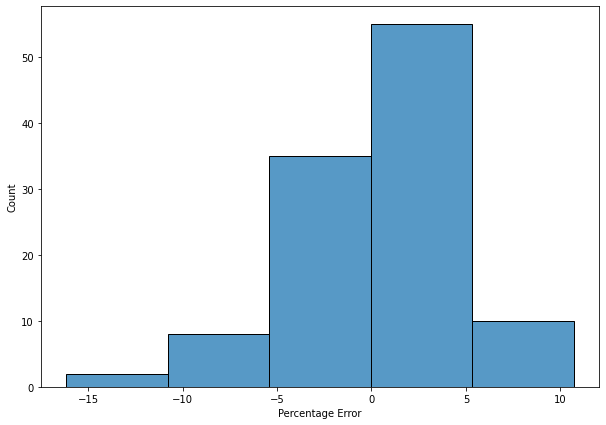

In [11]:
df1 = pd.read_csv('TrueVsPred_train-30-TL.csv', delimiter = ",")
df1.drop(df.columns[[0]], axis = 1, inplace = True)
df1['Percentage Error'] = (df1['Prediced'] - df1['True'])/df1['True']*100
fig = plt.figure(figsize=(10, 7))
sns.histplot(df1['Percentage Error'], bins = 5)
plt.savefig('Pred_True_train_percentage_error.png', dpi = 100)
df.to_csv('Pred_True_train_percentage_error.csv')

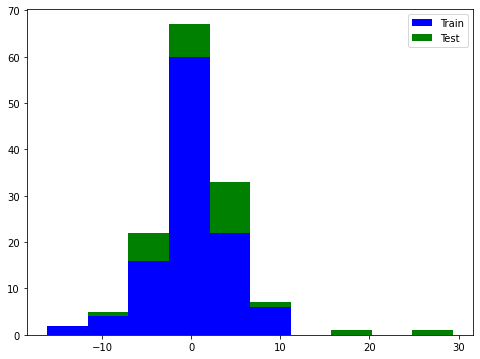

In [13]:
plt.figure(figsize=(8,6))
x = pd.DataFrame({'Train':df1['Percentage Error'], 'Test': df['Percentage Error']})
plt.hist(x, bins = 10, label = ['Train', 'Test'], color = ['blue', 'green'], stacked = True)
plt.legend(['Train', 'Test'])
plt.savefig('Pred_True_train-test_percentage_error.svg', dpi = 100)
x.to_csv('Pred_True_train-test_percentage_error.csv')

In [68]:
x = pd.DataFrame({'Train':df1['Percentage Error'], 'Test': df['Percentage Error']})

In [8]:
data = pd.read_csv(r'C:\Users\harik\OneDrive\Documents\Python\Graphene\data.csv',delimiter=",")
data = data.dropna()
data = data.drop_duplicates()
data = data.sample(frac = 1)
data.shape

(597, 5)

In [4]:
data.dtypes

LO    float64
CO      int64
T       int64
CS    float64
FS    float64
FT    float64
dtype: object

In [5]:
data.head(20)

,LO,CO,T,CS,FS,FT
717,13.9,0,300,0.700,23.090,23.090000
498,0.0,60,100,0.700,60.590,60.590000
162,0.0,30,600,0.025,110.139,110.139000
935,30.0,0,800,0.600,27.660,27.658000
610,13.9,0,0,0.025,163.840,163.844866
560,0.0,10,0,0.200,61.600,61.600000
992,30.0,45,600,0.025,115.718,0.000000
462,0.0,60,400,0.300,65.500,65.500000
744,13.9,30,0,0.025,152.280,152.280000
1024,30.0,60,600,0.300,58.490,0.000000


In [6]:
df = data.groupby(['LO', 'CO', 'CS' ])
#df.get_group((30, 0.1))
#T3 = df.get_group((0, 0.8))
#fig, ax = plt.subplots(figsize = (10, 7))
#sns.lineplot(x = 'T', y = 'FS', data = T2, ax = ax)
#sns.lineplot(x = 'T', y = 'FS', data = T3, ax = ax)
df.get_group((13.9, 0, 0.05))

,LO,CO,T,CS,FS,FT
623,13.9,0,0,0.05,106.10,106.099241
624,13.9,0,100,0.05,89.32,89.324280
633,13.9,0,1000,0.05,69.90,69.900000
628,13.9,0,500,0.05,82.90,82.900000
629,13.9,0,600,0.05,80.83,80.827504
631,13.9,0,800,0.05,77.60,77.600000
634,13.9,0,1100,0.05,67.30,67.300000
630,13.9,0,700,0.05,80.60,80.600000
627,13.9,0,400,0.05,83.00,83.000000
632,13.9,0,900,0.05,74.38,74.381967


In [7]:
t = data.CO.unique()

Text(0.5, 1.0, 'Fracture Strength versus Temperature')

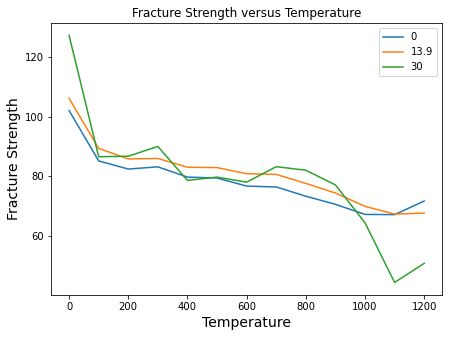

In [12]:
T = df.get_group((0,0, 0.8))
fig, ax = plt.subplots(figsize = (7, 5))
p = sns.lineplot(x = 'T', y = 'FS', data = df.get_group((0,0, 0.05)), ax = ax)
p = sns.lineplot(x = 'T', y = 'FS', data = df.get_group((13.9,0, 0.05)), ax = ax)
p = sns.lineplot(x = 'T', y = 'FS', data = df.get_group((30,0, 0.05)), ax = ax)
plt.legend(labels= [0, 13.9, 30])
p.set_xlabel("Temperature", fontsize = 14)
p.set_ylabel("Fracture Strength", fontsize = 14)
p.set_title("Fracture Strength versus Temperature")

Text(0.5, 1.0, 'Fracture Strength versus Temperature')

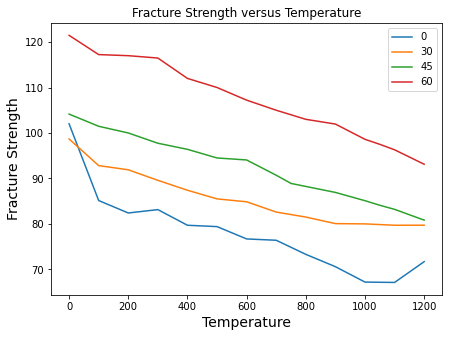

In [13]:
fig, ax = plt.subplots(figsize = (7, 5))
legend = []
for i in range(0, 61, 15):
    if(i == 15):
        continue;
    legend.append(round(i, 1))
    T = df.get_group((0, i, 0.05))
    p = sns.lineplot(x = 'T', y = 'FS', data = T, ax = ax)
plt.legend(labels= legend)
p.set_xlabel("Temperature", fontsize = 14)
p.set_ylabel("Fracture Strength", fontsize = 14)
p.set_title("Fracture Strength versus Temperature")

Text(0.5, 1.0, 'Fracture Strength versus Temperature')

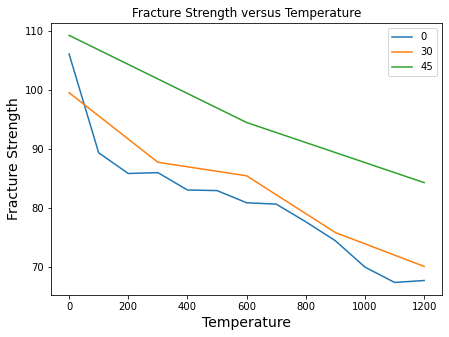

In [15]:
fig, ax = plt.subplots(figsize = (7, 5))
legend = []
for i in range(0, 60, 15):
    if(i == 15):
        continue;
    legend.append(round(i, 1))
    T = df.get_group((13.9, i, 0.05))
    p = sns.lineplot(x = 'T', y = 'FS', data = T, ax = ax)
plt.legend(labels= legend)
p.set_xlabel("Temperature", fontsize = 14)
p.set_ylabel("Fracture Strength", fontsize = 14)
p.set_title("Fracture Strength versus Temperature")

Text(0.5, 1.0, 'Fracture Strength versus Temperature')

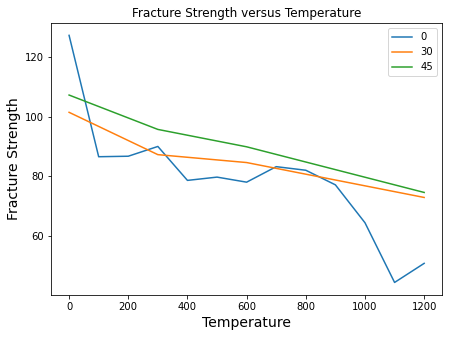

In [16]:
fig, ax = plt.subplots(figsize = (7, 5))
legend = []
for i in range(0, 60, 15):
    if(i == 15):
        continue;
    legend.append(round(i, 1))
    T = df.get_group((30, i, 0.05))
    p = sns.lineplot(x = 'T', y = 'FS', data = T, ax = ax)
plt.legend(labels= legend)
p.set_xlabel("Temperature", fontsize = 14)
p.set_ylabel("Fracture Strength", fontsize = 14)
p.set_title("Fracture Strength versus Temperature")

Text(0, 0.5, 'Fracture Strength')

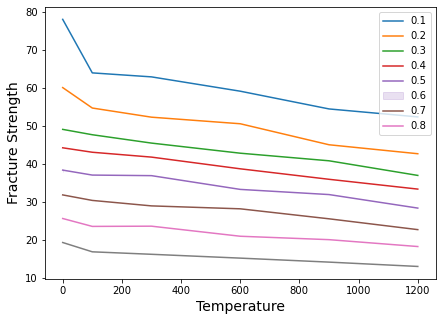

In [140]:
fig, ax = plt.subplots(figsize = (7, 5))
legend = []
for i in np.arange(0.1, 0.9, 0.1):
    legend.append(round(i, 1))
    T = df.get_group((0,0, round(i, 1)))
    p = sns.lineplot(x = 'T', y = 'FS', data = T, ax = ax)
plt.legend(labels= legend)
p.set_xlabel("Temperature", fontsize = 14)
p.set_ylabel("Fracture Strength", fontsize = 14)

Text(0, 0.5, 'Fracture Strength')

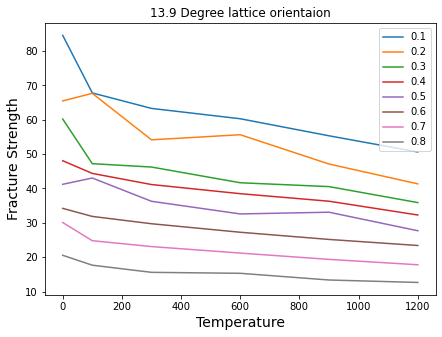

In [147]:
fig, ax = plt.subplots(figsize = (7, 5))
legend = []
for i in np.arange(0.1, 0.9, 0.1):
    legend.append(round(i, 1))
    T = df.get_group((13.9,0, round(i, 1)))
    p = sns.lineplot(x = 'T', y = 'FS', data = T, ax = ax)
plt.legend(labels= legend)
plt.title('13.9 Degree lattice orientaion')
p.set_xlabel("Temperature", fontsize = 14)
p.set_ylabel("Fracture Strength", fontsize = 14)

Text(0, 0.5, 'Fracture Strength')

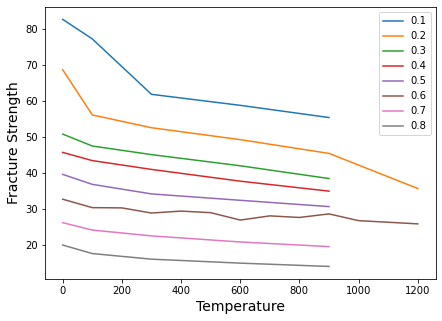

In [142]:
fig, ax = plt.subplots(figsize = (7, 5))
legend = []
for i in np.arange(0.1, 0.9, 0.1):
    legend.append(round(i, 1))
    T = df.get_group((30,0, round(i, 1)))
    p = sns.lineplot(x = 'T', y = 'FS', data = T, ax = ax)
plt.legend(labels= legend)
p.set_xlabel("Temperature", fontsize = 14)
p.set_ylabel("Fracture Strength", fontsize = 14)